# MPA-MLF, Lab 2 - K-means

K-means is one of the most popular unsupervised machine learning algorithms, well known for its simplicity. This algorithm aims to separate unlabeled data into different clusters(subgroups) with the number of clusters represented by the variable *K*. Data points in the same cluster are very similar, while data points in different clusters are very different. The similarity of data is based on some similarity metric, where the similarity metric can be distance-based, correlation-based, etc.

In our case, we will use distance-based metrics. Any distance-based metrics for numeric variables can be employed, for example:
 - Euclidean distance
 - Manhattan distance
 - Cosine similarity


There is an example how K-means works:

1. Imagine you have a bunch of dots scattered on a piece of paper. These dots represent data points, and the goal of the k-means algorithm is to group similar dots into clusters

2. To start, you randomly select *k* dots from the scatter plot and assign each one to be the center of a cluster. These *k* dots are called centroids.

3. Then, you calculate the distance between each dot and each centroid and assign each dot to the closest centroid, effectively grouping the dots into k clusters.

4. Next, you recalculate the centroid of each cluster by finding the average position of all the dots in that cluster.

5. Repeat steps 3 and 4 until the centroids no longer change, meaning the clusters have stabilized.

6. Finally, the algorithm outputs the k clusters and the corresponding centroids.


In our case, we would use a Euclidian distance as a metric. Mathematically speaking, the goal would be to minimalize the following objective function:

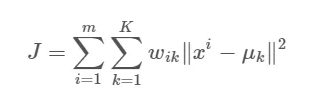

where:
   - *k* represents number of clusters (groups)
   - *m* represents number of points
   - u_k represents centroids
   - x_i represents data point
   - w_ik represents weight where wik=1 for data point xi if it belongs to cluster k; otherwise, wik=0.

There are some typical applications of using k-means:
- Customer Segmentation: k-means can segment customers based on their demographic information or purchase behavior. This information can then be used for targeted marketing or to improve the customer experience.

- Image Compression: k-means can reduce the number of colors in an image while preserving its visual quality. This is done by replacing similar color pixels with a single color, thereby reducing the amount of data required to represent the image.

- Anomaly Detection: k-means can be used to identify outliers or anomalies in a dataset by clustering similar data points and identifying data points far from the centroids of their respective clusters.

- Document Clustering: k-means can cluster documents based on their content, for example, to group news articles by topic or categorize customer support tickets.

- Market Segmentation: k-means can be used to segment a market based on customer characteristics, such as age, income, or spending habits, in order to identify subgroups of customers with similar needs or preferences.


Recomended sources:
 - https://towardsdatascience.com/log-book-guide-to-distance-measuring-approaches-for-k-means-clustering-f137807e8e21
 - https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
 - https://realpython.com/k-means-clustering-python/
 - https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875
 - https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
 - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# Exercise 1 - K-means from scratch

## Implementing K-means

In this exercise, the task would be to implement a simple k-means algorithm from scratch, as described above. Let's rewrite the steps to be more readily implementable

### Steps:
  1. Specify the number of clusters *K*
  2. initialize centroids
  3. calculate the distance from centroids to all points in datasets
  4. assign data points to the closest centroids
  5. calculate objective function
  6. compute new centroids to the clusters by taking the average of all data points that belong to each cluster
  7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached


Tips:
- Try to avoid using loops what if it is not necessary, instead of using loops, use numpy functions. There is a list of numpy functions that you might find usefull:
    - np.argmin()
    - np.where()
    - np.transpose()
    - np.random.permutation()
    - np.random.schuffle()
    - np.linalg.norm()
    - np.arange()
    - np.split()
    - np.random.choice()


- Since the initial clusters are selected randomly, so the algorithm can lead to different results each time its runned. To obtain the best results, it is helpful to run the algorithm multiple times and select result with the lowest objective function


### Code

**Please note that the code structure provided below is only a recommendation. If you prefer, you can use your own code structure. If you are familiar with OOP, you can also use it. However, writing your code in one function or not using functions at all is not the recommended approach**

In [39]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

### 0. Load dataset

Use the following code to load data

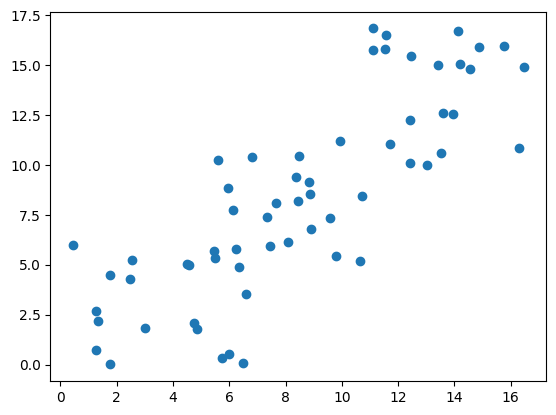

In [40]:
loaded_points = np.load('/content/k_mean_points.npy')

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])

### 1. Specify number of clusters *K*

In [41]:
k = 3

### 2. initialize centroids

There are more techniques, on how to change initial centroids. In out case, we will take all available points and shuffle them randomly, then we will choose first *k_clusters* points as initial centroids

In [42]:
def initialize_clusters(points: np.array, k_clusters: int) -> np.array:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int

    :return: initial_clusters
    initial_clusters: Array of initialized centroids
    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    """

    # Shuffle the points randomly
    np.random.shuffle(points)

    # Selecting first k_clusters points as initial centroids
    initial_clusters = points[:k_clusters]

    return initial_clusters


In [43]:
initialize_clusters(loaded_points,k)

array([[ 2.46318131,  4.31101006],
       [ 9.9357077 , 11.20442432],
       [10.72529411,  8.44486038]])

### 3. Calculate distance from centroids to all points in datasets

3.1 Fistly, create a function to calculate distance from one centroid to all points in the dataset

In [73]:
def calculate_metric(points: np.array, centroid: np.array) -> np.array:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,)
    """

    # Calculating the Euclidean distance between centroid and each point in the dataset
    distances_array = np.linalg.norm(points - centroid, axis=1)

    return distances_array

In [74]:
initial_clusters = initialize_clusters(loaded_points, k)
print("Initial clusters:", initial_clusters)

# Choosing one centroid for testing
test_centroid = initial_clusters[0]

# Calculating the distances from the test centroid to all points
distances_array = calculate_metric(loaded_points, test_centroid)

print("Distances from test centroid to points:", distances_array)

Initial clusters: [[ 7.35303759  7.37369046]
 [15.75831528 15.98074375]
 [ 6.14700838  7.74303618]
 [11.10294858 15.74739436]
 [ 2.53970335  5.26471704]
 [ 6.00496171  0.55857805]
 [ 9.58603089  7.36472467]
 [ 4.85118811  1.78914034]
 [ 5.46249345  5.69923549]]
Distances from test centroid to points: [ 0.         12.03038069  1.26131785  9.17500679  5.25508852  6.94716242
  2.2330113   6.11935052  2.52546166  7.31702043  2.05064869  7.03677457
 10.34548462  8.12900024  9.2409832   7.04479913  5.76980985  9.55612042
  7.93911875  1.45556863 10.28477423  1.35369687  5.70155109  5.88182943
  5.75128183 11.5485594  11.37829351  3.37428068  3.68869375  9.60054822
  3.29369348  3.07628852  2.76140044  1.66707205  7.66822374  3.671145
  1.91194983  3.89481514  9.4457204   0.78663209 10.18991892  1.4263935
  9.74269531  8.37992097  9.01063937  7.20953339  6.28346508  1.92981201
  2.26387634  7.02011215  2.32741153  6.27414049  3.53829323  2.68147913
  3.94056578  4.62003321  3.11201647 10.0790

In [75]:
print("Shape of distances array:", distances_array.shape)

Shape of distances array: (60,)


3.2 Secondly, create a function to calculate distance between points and all centroids using function from 3.1

In [76]:
def compute_distances(points: np.array, centroids_points: np.array) -> np.array:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: All centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)

    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """

    # Initializing an empty array to store distances
    distances_array = np.zeros((len(centroids_points), len(points)))

    # Iteration over each centroid
    for i, centroid in enumerate(centroids_points):
        # Calculating distances from each point to the current centroid
        distances_array[i] = calculate_metric(points, centroid)

    return distances_array


In [77]:
initial_clusters = initialize_clusters(loaded_points, 3)

# Compute distances from points to centroids
distances_array = compute_distances(loaded_points, initial_clusters)

print("Shape of distances array:", distances_array.shape)
print("Distances from points to centroids:")
print(distances_array)

Shape of distances array: (3, 60)
Distances from points to centroids:
[[ 0.         13.47832079 20.52680934 12.17705768  6.93296772 15.14583517
   2.1085085  17.37624925 14.1669963  14.0245416  15.17923816  6.25574467
  11.23814201  3.02013322 17.38630711  1.86288754  1.68597606 11.34805474
   9.2265333   9.31847724  2.56339423 14.29498542 16.29936626  1.98380444
  18.0930433  10.6950689  10.40460432 12.70878321 19.02659388 18.28608116
   1.78979201 12.01665978  2.95838059  9.67190742 17.38906656  8.95245399
   9.73387797  6.1722073  17.5831501  20.78836992 12.09702932  4.17465258
  10.78250875  4.17289547 19.36139262  4.7826181   6.83555342 17.03576027
  11.5485594  12.04953699  6.15893453  8.43153164  1.10140269  2.73720524
  18.40364239  6.79128633  3.18118188 10.25837697 18.56513516 15.14001565]
 [13.47832079  0.          7.09875162  1.88875622  6.54937997  1.89379072
  11.48324522  3.98804907  0.91931062  0.77715435  2.27256166 11.26436043
   2.84622139 12.07256836  5.78214786 11.

### 4. Assign datapoints to the closest centroids

In [78]:
def assign_centroids(distances: np.array) -> np.array:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    # Finding the index of the centroid with the minimum distance for each point
    assigned_centroids = np.argmin(distances, axis=0)

    return assigned_centroids

In [79]:
# Compute distances from points to centroids
distances_array = compute_distances(loaded_points, initial_clusters)

# Call the function
assigned_clusters = assign_centroids(distances_array)

# Print the result
print("Assigned centroids:", assigned_clusters)
# Print the result
print("Assigned centroids:", assigned_clusters.shape)

Assigned centroids: [0 1 2 1 1 1 0 2 1 1 1 0 1 0 2 0 0 1 1 1 0 1 1 0 2 1 1 1 2 2 0 1 0 1 2 1 1
 0 2 2 1 0 1 0 2 0 0 2 1 1 0 1 0 0 2 0 0 1 2 1]
Assigned centroids: (60,)


### 5. Calculate objective function

In [80]:
def calculate_objective(assigned_centroids: np.array, distances: np.array) -> float:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n) and dtype = np.float64

    :return: objective_function_value
    :rtype: float
    """

    assigned_centroids = assigned_centroids.ravel()

    # Doing here a sum of squared distances from each point to its assigned centroid
    objective_function_value = np.sum(distances[assigned_centroids, np.arange(len(assigned_centroids))])

    return objective_function_value

In [81]:
# Computing the objective function value
objective_function_value = calculate_objective(assigned_clusters, distances_array)

print("Objective function value:", objective_function_value)

Objective function value: 192.78065431047781


### 6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [82]:
def calculate_new_centroids(points: np.array, assigned_centroids: np.array, k_clusters: int) -> np.array:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32

    :param k_clusters: Number of clusters.
    :type k_clusters: int

    :return: new_clusters
    new_clusters: New cluster points.

    :rtype:
    new_clusters: ndarray with shape (k_clusters, 2) and dtype = np.float32
    """
    new_clusters = np.zeros((k_clusters, points.shape[1]))  # Initializing array for new centroids

    # Iteration over each cluster
    for i in range(k_clusters):
        # Finding points belonging to the current cluster
        cluster_points = points[assigned_centroids == i]

        # Calculating the mean of the points in the cluster
        if len(cluster_points) > 0:
            new_clusters[i] = np.mean(cluster_points, axis=0)

    return new_clusters

In [83]:
k_clusters = initial_clusters.shape[0]

# Computing new centroids
new_centroids = calculate_new_centroids(loaded_points, assigned_clusters, k_clusters)

print("New centroids:", new_centroids)


New centroids: [[13.40629792 13.94039833]
 [ 7.38233843  7.24339533]
 [ 3.16801963  2.09068799]]


###   7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached

In [84]:
def fit(points: np.array, k_clusters: int, n_of_iterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_iterations:  Maximum number of iterations
    :type n_of_iterations: int


    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective function

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float

    """

    centroid_points = initialize_clusters(points, k_clusters)

    last_objective = 10000.0

    for _ in range(n_of_iterations):
        # Calculation of the distances from centroids to all points
        distances = compute_distances(points, centroid_points)

        # Assigning the points to the closest centroids
        assigned_centroids = assign_centroids(distances)

        # Computing new centroids
        new_centroid_points = calculate_new_centroids(points, assigned_centroids, k_clusters)

        # Calculation of the objective function value
        objective_value = calculate_objective(assigned_centroids, distances)

        # Checking if there is an convergence or not
        if abs(last_objective - objective_value) < error:
            break

        # Updating centroids and objective function value
        centroid_points = new_centroid_points
        last_objective = objective_value

    return centroid_points, last_objective

In [85]:
k_clusters = 3
n_of_iterations = 10
error = 0.001

centroid_points, last_objective = fit(loaded_points, k_clusters, n_of_iterations, error)

print("Final centroid points:", centroid_points)
print("Final objective function value:", last_objective)

Final centroid points: [[13.58564413 14.56674125]
 [ 3.94687552  3.22672218]
 [ 8.85422796  8.46194624]]
Final objective function value: 150.0191980544267


# Evaluation methods - How to determine *k*?

One of the disadvantages of using k-means is that it requires a number of centroids *k* as an input, and it is not usually that obvious, there are some methods that exist to choose the right number of centroids at the beginning. In this part of a lecture, we would describe two methods to choose the right *k* value, *Elbow method* and *Silhouette analysis*

## Elbow method

The Elbow Method is a technique used in determining the optimal number of clusters for k-means clustering. The basic idea is to plot the explained variation as a function of the number of clusters and pick the elbow of the curve as the number of clusters to use. In the picture below you can see that the best *k* value is 3

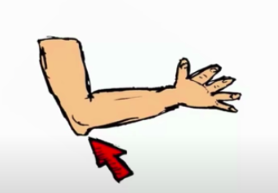 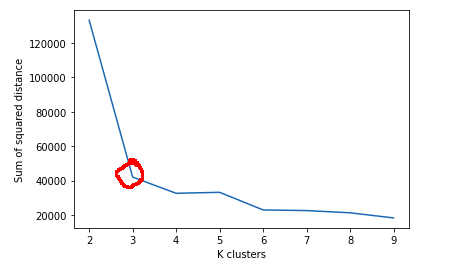

The main advantage of this method that its very simple and easy to implement, on the other hand sometimes it is not very clear where the elbow is

## Silhouette analysis

Silhouette analysis is a method to evaluate the quality of clustering results by measuring how similar each data point is to its own cluster compared to other clusters. A high silhouette score indicates that the data points in a cluster are well-separated from other clusters and that the clustering solution is good.

The silhouette score can be calculated using the following formula. This measure has a range of [-1, 1] and it is calculated for each sample in the dataset

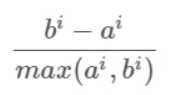

where:
 - a_i represents the average distance of that point with all other points in the same clusters
 - b_i represents the average distance of that point with all the points in the closest cluster to its cluster

if
 - is 0 –> the sample is very close to the neighboring clusters.
 - is 1 –> the sample is far away from the neighboring clusters.
 - is -1 –> the sample is assigned to the wrong clusters.

## Exercise 2 - Implementing an Elbow Method

Implementing an elbow method is simple,
 1. Create a vector of possible *k* values
 2. Fit your data using different *k* values and save the objective function value
 3. Plot objective function values in terms of *k* values
 4. Find an elbow

In [86]:
import matplotlib.pyplot as plt
import numpy as np


k_all = range(2, 10)
all_objective = []


for k in k_all:
    # Fitting the data using current k value
    centroid_points, last_objective = fit(loaded_points, k, n_of_iterations, error)
    all_objective.append(last_objective)

Text(0, 0.5, 'Sum of squared distance')

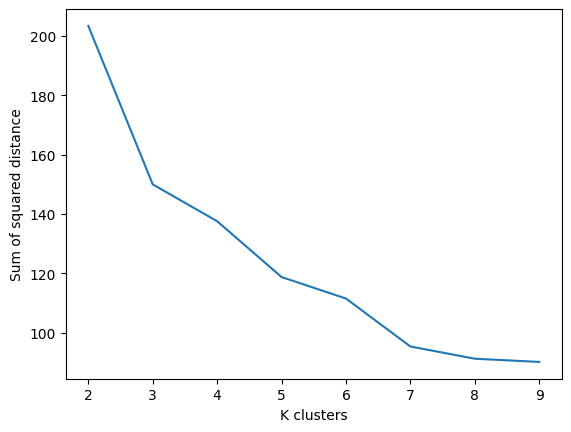

In [87]:
plt.figure()
plt.plot(k_all, all_objective)
plt.xlabel('K clusters')
plt.ylabel('Sum of squared distance')

# **Result of Finding an Elbow**

While the provided visualization might suggest an elbow point around k=4, it's important to exercise caution due to the limited information available. The decrease in the objective function value seems to slow down around k=4, but the overall data might not be conclusive.

# Exercise 3 - Image Compression

In this exercise, the task would be to implement simple image compression using the k-means algorithm. You can use an image in the directory *Data\\*. This time, we will use a library that implements k-means for us - *sklearn* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. To load the image you can use *openCv* or *matplotlib* (or anything else)

### Steps

   1. Firstly reshape your image to 2D array with shape (image.width*image.height, n_of_colour_channels)
   2. Initialize the K_means algorithm, where K would be equal to the number of colors in the compressed image
   3. check cluster centroids and convert them to integers - these are your new colors (kmeans.cluster_centers_ could be useful)
   4. replace your 2D arrays colors with newly generated colors
   5. reshape your 2D array to the original image shape

Tips:
- it takes a couple of seconds to compress the attached image, you can work on your algorithm using different (smaller) image
- the implementation can be done in single function

In [88]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np

### 1. load image

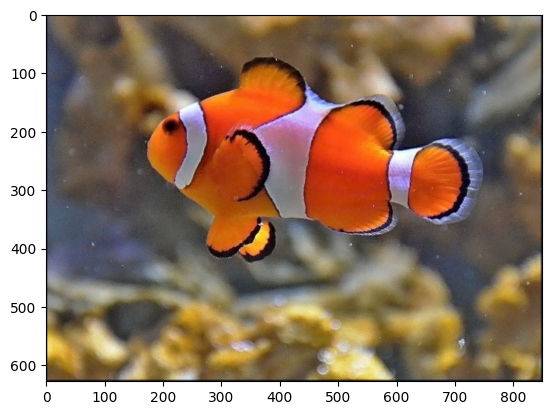

In [89]:
loaded_image = imread('/content/fish.jpg')

plt.imshow(loaded_image)
plt.show()

In [90]:
def compress_image(image: np.array, number_of_colours: int) -> np.array:
    """
    Compresses the given image by reducing the number of colours used in the image.

    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """
    # Reshaping the input image to a 2D array
    height, width, channels = image.shape
    flattened_image = image.reshape(-1, channels)

    # KMeans clustering
    kmeans = KMeans(n_clusters=number_of_colours, n_init=10, random_state=0)
    kmeans.fit(flattened_image)

    # Replacing pixel colors with the closest centroid colors
    compressed_flattened_image = kmeans.cluster_centers_[kmeans.labels_]

    # Reshaping the compressed image back to the original shape
    compressed_image = compressed_flattened_image.reshape(height, width, channels)

    return compressed_image


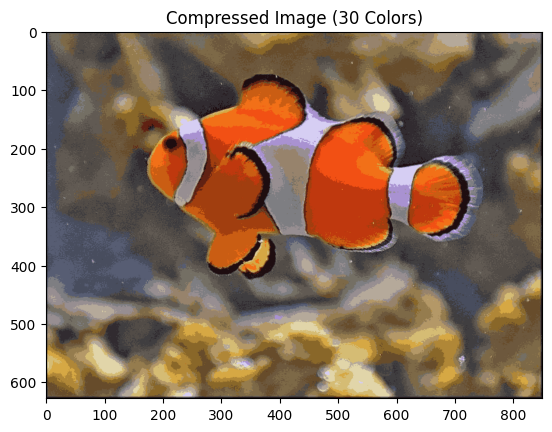

In [91]:
img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img.astype(np.uint8))  # We ensure here that image data type is uint8 for proper display
plt.title('Compressed Image (30 Colors)')
plt.show()